In [1]:
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Generate sintetic data fist month of the 2023

In [2]:
START_DATE = datetime.strptime("2023-01-01", "%Y-%m-%d")

In [3]:
START_DATE

datetime.datetime(2023, 1, 1, 0, 0)

In [5]:
START_DATE + timedelta(seconds=1)

datetime.datetime(2023, 1, 1, 0, 0, 1)

In [6]:
month_time_data = np.array([START_DATE+timedelta(seconds=seconds) for seconds in range(60*60*24*30)])

In [7]:
START_DATE.second

0

# Set the minimun unit in seconds and build from that

In [9]:
SECONDS_IN_ONE_MINUTE = 60
SECONDS_IN_ONE_HOUR = 60*SECONDS_IN_ONE_MINUTE
SECONDS_IN_ONE_DAY = 24*SECONDS_IN_ONE_HOUR

In [10]:
month_time_data[3*SECONDS_IN_ONE_DAY]

datetime.datetime(2023, 1, 4, 0, 0)

In [11]:
START_DATE

datetime.datetime(2023, 1, 1, 0, 0)

# The idea is to take the seconds from the START_DATE you can actually take another date as reference.

In [12]:
(month_time_data[2]-START_DATE).total_seconds()

2.0

In [13]:
total_seconds_array = np.array([datediff.total_seconds() for datediff in month_time_data-START_DATE])

In [14]:
total_seconds_array[60]

60.0

In [43]:
sin_hour = np.array([np.sin((2*np.pi*total_seconds)/SECONDS_IN_ONE_HOUR) for total_seconds in total_seconds_array])

# Let's study what happen in the first hour

In [44]:
sin_hour[0]

0.0

# 15 minutes into the first hour

In [46]:
sin_hour[SECONDS_IN_ONE_MINUTE*15]

1.0

# 30 minutes into the first hour 

In [78]:
np.round(sin_hour[SECONDS_IN_ONE_MINUTE*30], 4)

0.0

# 45 minutes into the first hour

In [48]:
sin_hour[60*45]

-1.0

# Ploting the sin signal for the first hour

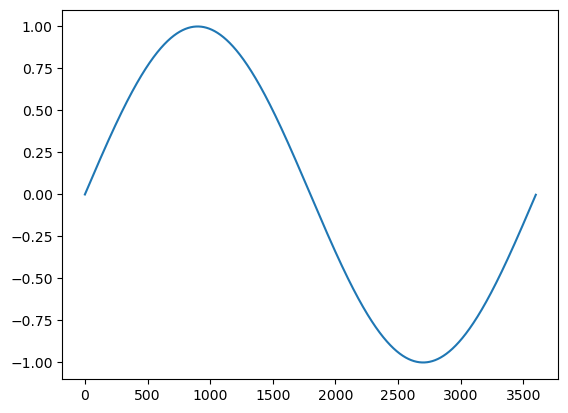

In [58]:
plt.plot(total_seconds_array[:60*60], sin_hour[:60*60])

# Now let's see the next hour

# Minute 0 of into the second hour

In [70]:
np.round(sin_hour[SECONDS_IN_ONE_HOUR], 4)

-0.0

# Minute 15 of into the second hour

In [69]:
np.round(sin_hour[SECONDS_IN_ONE_HOUR+SECONDS_IN_ONE_MINUTE*15], 4)

1.0

# Minute 30 of into the second hour

In [71]:
np.round(sin_hour[SECONDS_IN_ONE_HOUR+SECONDS_IN_ONE_MINUTE*30], 4)

0.0

# Minute 45 of into the second hour

In [72]:
np.round(sin_hour[SECONDS_IN_ONE_HOUR+SECONDS_IN_ONE_MINUTE*45], 4)

-1.0

# Last minute of into the second hour begining the 3rd hour

In [73]:
np.round(sin_hour[SECONDS_IN_ONE_HOUR+SECONDS_IN_ONE_MINUTE*60], 4)

-0.0

# First, second and third hours sin curves

- First hour: Blue
- Second hour: Orange
- Third hour: Green

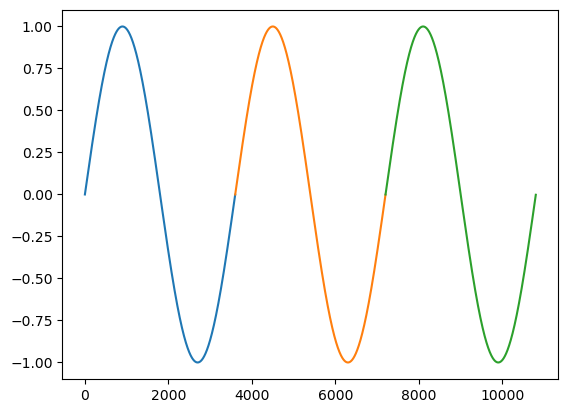

In [79]:
plt.plot(total_seconds_array[:SECONDS_IN_ONE_HOUR], sin_hour[:SECONDS_IN_ONE_HOUR])
plt.plot(total_seconds_array[SECONDS_IN_ONE_HOUR:2*SECONDS_IN_ONE_HOUR], sin_hour[SECONDS_IN_ONE_HOUR:2*SECONDS_IN_ONE_HOUR])
plt.plot(total_seconds_array[2*SECONDS_IN_ONE_HOUR:3*SECONDS_IN_ONE_HOUR], sin_hour[2*SECONDS_IN_ONE_HOUR:3*SECONDS_IN_ONE_HOUR])

# We can do the same but instead of modeling a turn per hour we can do it per day

In [80]:
sin_day = np.array([np.sin((2*np.pi*total_seconds)/SECONDS_IN_ONE_DAY) for total_seconds in total_seconds_array])

# At the begining of the day

In [81]:
sin_day[0]

0.0

# After 6 hours

In [88]:
sin_day[SECONDS_IN_ONE_HOUR*6]

1.0

# After 18 hours

In [90]:
sin_day[SECONDS_IN_ONE_HOUR*18]

-1.0

# At the end of the day

In [95]:
np.round(sin_day[SECONDS_IN_ONE_HOUR*24], 4)

0.0

# If we plot the 2 curves the time model as a sin signal.

### In blue per hour in orange per day we should se 24 1 and -1 each for each hour of the days and only 1 orange curve.

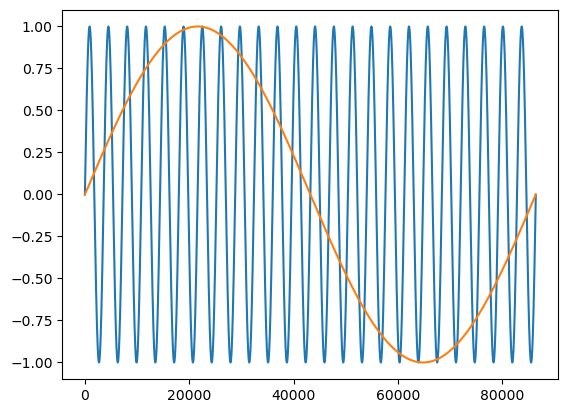

In [94]:
plt.plot(total_seconds_array[:SECONDS_IN_ONE_DAY], sin_hour[:SECONDS_IN_ONE_DAY])
plt.plot(total_seconds_array[:SECONDS_IN_ONE_DAY], sin_day[:SECONDS_IN_ONE_DAY])

Conclusion:

- Not only is a way to let know your model where is in the day also in each hour bucket the first 30 minutes the curve is positive and shifts to a negative value until it reaches zero again and the next hour starts.
- For the day in the first half the is positive reaching a maximum of 1 at 6 am, and negative after the 12 hours, reaching its max negative value at 18hs.
- This shift is soft and allows us to make distinctions between the different positions of the day and how are decreasing or increasing as each phase reaches its end or beginning.
- Sin is a differentiable function which is compatible with the optimization techniques based on gradient descent.